In [12]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
#Read in FEMA data
fema = pd.read_csv('publicAssistanceData/byDisasterandCounty.csv')
fema.head()

,incidentType,state,county,incidentCount,FEMA$
0,Chemical,WestVirginia,Boone,6,12013.226667
1,Chemical,WestVirginia,Cabell,2,3826.870000
2,Chemical,WestVirginia,Kanawha,12,50986.351667
3,Chemical,WestVirginia,Lincoln,9,7432.647778
4,Chemical,WestVirginia,Putnam,13,5519.388462


In [4]:
states = {"Alabama":'AL',"Alaska":'AK',"Arizona":'AZ',"Arkansas":'AR',"California":'CA',"Colorado":"CO",
  "Connecticut":"CT","Delaware":"DE","Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID","Illinois":"IL",
  "Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD",
  "Massachusetts":"MA","Michigan":"MI","Minnesota":"MN","Mississippi":"MS","Missouri":"MI","Montana":"MT",
  "Nebraska":"NE","Nevada":"NV","NewHampshire":"NH","NewJersey":"NJ","NewMexico":"NM","NewYork":"NY",
  "NorthCarolina":"NC","NorthDakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR","Pennsylvania":"PA",
  "RhodeIsland":"RI","SouthCarolina":"SC","SouthDakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT",
  "Vermont":"VT","Virginia":"VA","Washington":"WA","WestVirginia":"WV","Wisconsin":"WI","Wyoming":"WY", "DistrictofColumbia":"DC"}
df_states = fema['state']
state_fix = [states[state] for state in df_states]
fema['state'] = state_fix
fema.head()

,incidentType,state,county,incidentCount,FEMA$
0,Chemical,WV,Boone,6,12013.226667
1,Chemical,WV,Cabell,2,3826.870000
2,Chemical,WV,Kanawha,12,50986.351667
3,Chemical,WV,Lincoln,9,7432.647778
4,Chemical,WV,Putnam,13,5519.388462


In [5]:
#Read in SAPIE data
sapie = pd.read_csv('SAPIE_DataClean/ByYear/18SAPIE.csv')
#Clean SAPIE Data
sapie['Name'] = sapie['Name'].str.strip('County')
sapie['Name'] = sapie['Name'].str.strip()
sapie = sapie.drop(['Unnamed: 0', 'State County FIPS'], axis=1)
sapie = sapie.rename(columns={'Postal Code':'state', 'Name':'county'})
sapie.head()

,state,county,Median Household Income
0,AL,Autauga,44241
1,AL,Baldwin,41961
2,AL,Barbour,26062
3,AL,Bibb,32924
4,AL,Blount,37758


In [6]:
#Add Income data to FEMA
merged = fema.merge(sapie, on=['state', 'county'])
merged.head()

,incidentType,state,county,incidentCount,FEMA$,Median Household Income
0,Chemical,WV,Boone,6,1.201323e+04,28675
1,Hurricane,WV,Boone,5,5.059812e+03,28675
2,Severe Storm(s),WV,Boone,33,3.314241e+04,28675
3,Chemical,WV,Kanawha,12,5.098635e+04,36379
4,Flood,WV,Kanawha,19,1.165905e+06,36379


merged_tom = pd.merge(fema, sapie, how='inner')
merged_tom

In [10]:
#Bin data by Med income
merged['Median Household Income'] = merged['Median Household Income'].astype(int)
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
labels = ['10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k']
merged['incomeGroup'] = pd.cut(merged['Median Household Income'], bins=bins, labels=labels)
merged.head()

,incidentType,state,county,incidentCount,FEMA$,Median Household Income,incomeGroup
0,Chemical,WV,Boone,6,1.201323e+04,28675,20k-30k
1,Hurricane,WV,Boone,5,5.059812e+03,28675,20k-30k
2,Severe Storm(s),WV,Boone,33,3.314241e+04,28675,20k-30k
3,Chemical,WV,Kanawha,12,5.098635e+04,36379,30k-40k
4,Flood,WV,Kanawha,19,1.165905e+06,36379,30k-40k


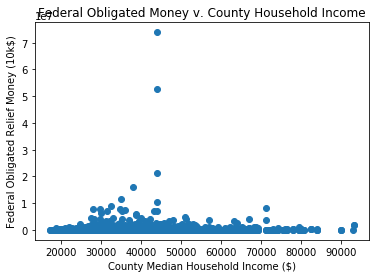

The correlation between Federal Obligated Relief Money and County Household income is 0.03


In [57]:
#Check Scatterplot of FEMA$ v. Income
plt.scatter(merged['Median Household Income'], merged['FEMA$'])
plt.title('Federal Obligated Money v. County Household Income')
plt.xlabel('County Median Household Income ($)')
plt.ylabel('Federal Obligated Relief Money (10k$)')
plt.savefig('plots/femavincome.png')
plt.show()
#Correlation of Fema v. Med income
correlation = st.pearsonr(merged['Median Household Income'], merged['FEMA$'])
print(f'The correlation between Federal Obligated Relief Money and County Household income is {round(correlation[0],2)}')

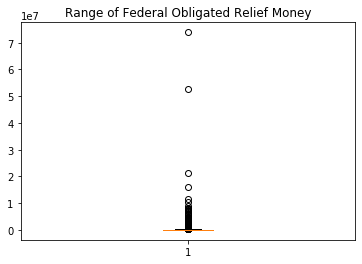

In [54]:
#Use box plot to check for outliers
plt.boxplot(merged['FEMA$'])
plt.title('Range of Federal Obligated Relief Money')
plt.savefig('plots/femarange.png')
plt.show()

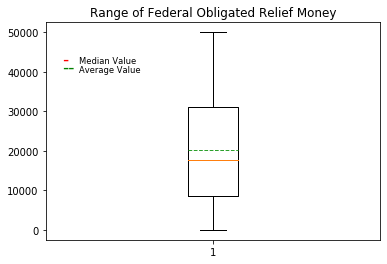

In [55]:
#Box Plot w/o 2 greatest values
merged_noOutliers = merged[merged['FEMA$'] < 5.0e+04]
plt.boxplot(merged_noOutliers['FEMA$'], showmeans=True, meanline=True)
plt.title('Range of Federal Obligated Relief Money')
plt.text(.55, 40000, '--', color='green', weight='roman', size='xx-large')
plt.text(.6, 40000, 'Average Value', color='black', weight='roman', size='small')
plt.text(.55, 42100, '-', color='red', weight='roman', size='xx-large')
plt.text(.6, 42100, 'Median Value', color='black', weight='roman', size='small')
plt.savefig('plots/femarange_noOutliers.png')
plt.show()

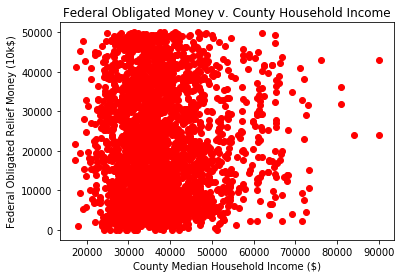

The correlation between Federal Obligated Relief Money and County Household income is 0.03


In [58]:
#ScatterPlot w/o outliers
#Check Scatterplot of FEMA$ v. Income
plt.scatter(merged_noOutliers['Median Household Income'], merged_noOutliers['FEMA$'], c='red')
plt.title('Federal Obligated Money v. County Household Income')
plt.xlabel('County Median Household Income ($)')
plt.ylabel('Federal Obligated Relief Money (10k$)')
plt.savefig('plots/femavincome_noOutliers.png')
plt.show()
#Correlation of Fema v. Med income
correlation = st.pearsonr(merged_noOutliers['Median Household Income'], merged_noOutliers['FEMA$'])
print(f'The correlation between Federal Obligated Relief Money and County Household income is {round(correlation[0],2)}')

In [30]:
#Group by income group
incomegroup = merged.groupby('incomeGroup')
incomegroup_df = pd.DataFrame({'countyCount':incomegroup.county.count(), 'incidentCount':incomegroup.incidentCount.sum(), 'averageFEMA$':incomegroup['FEMA$'].mean()})
incomegroup_df = incomegroup_df.reset_index(drop=False)
incomegroup_df

,incomeGroup,countyCount,incidentCount,averageFEMA$
0,10k-20k,30,265,109479.733986
1,20k-30k,1249,10733,171821.376255
2,30k-40k,2962,50863,162540.277969
3,40k-50k,1333,36106,300116.765750
4,50k-60k,339,11351,210206.245675
5,60k-70k,173,10597,201647.398746
6,70k-80k,45,1844,388245.650991
7,80k-90k,13,812,167131.207015
8,90k-100k,6,53,638036.853194


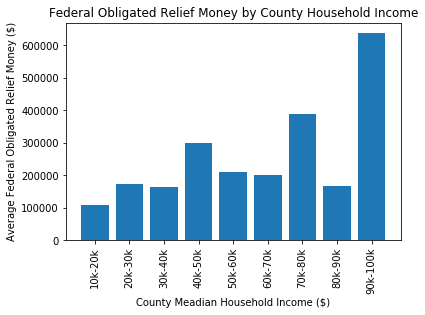

In [38]:
#Bar Plot of Average FEMA$ by income group
plt.bar(incomegroup_df.incomeGroup, incomegroup_df['averageFEMA$'])
plt.title('Federal Obligated Relief Money by County Household Income')
plt.xticks(rotation=90)
plt.xlabel('County Meadian Household Income ($)')
plt.ylabel('Average Federal Obligated Relief Money ($)')
plt.savefig('plots/incomeGroups_v_fema.png')
plt.show()

In [81]:
#Perform Chi Square on income groups
chi_df = incomegroup_df[['incomeGroup', 'averageFEMA$']]
chi_df = chi_df.set_index('incomeGroup')
chi_df['expected'] = chi_df['averageFEMA$'].mean()
st.chisquare(chi_df['averageFEMA$'], chi_df['expected'])

Power_divergenceResult(statistic=825200.4030694203, pvalue=0.0)

In [84]:
#Group data by disaster type
disaster_group = merged.groupby('incidentType')
disaster_df = pd.DataFrame({'averageFEMA$':disaster_group['FEMA$'].mean()})
disaster_df = disaster_df.reset_index(drop=False)
disaster_df.head()

,incidentType,averageFEMA$
0,Chemical,18987.903643
1,Coastal Storm,198837.695923
2,Dam/Levee Break,471388.658889
3,Earthquake,525588.601039
4,Fire,306589.744824


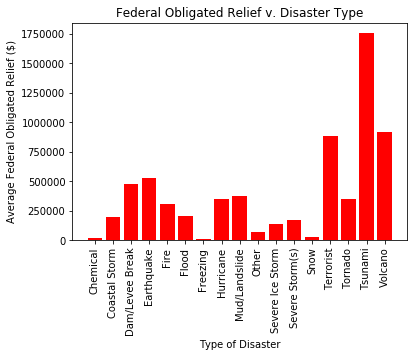

In [91]:
#Bar plot for disaster data
plt.bar(disaster_df.incidentType, disaster_df['averageFEMA$'], color='red')
plt.title('Federal Obligated Relief v. Disaster Type')
plt.xticks(rotation=90)
plt.xlabel('Type of Disaster')
plt.ylabel('Average Federal Obligated Relief ($)')
plt.savefig('plots/femavdisaster.png')
plt.show()

In [93]:
#Chi square of disaster data
chi_df2 = disaster_df[['incidentType', 'averageFEMA$']]
chi_df2 = chi_df2.set_index('incidentType')
chi_df2['expected'] = chi_df2['averageFEMA$'].mean()
st.chisquare(chi_df2['averageFEMA$'], chi_df2['expected'])

Power_divergenceResult(statistic=7840037.65932898, pvalue=0.0)